In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("Cleavland.csv")
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


     
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [7]:
# Columns we want to ensure are numeric
columns_to_convert = ['age', 'chol', 'thalach', 'target', 'cp']

df = df[df['target'].isin([0, 1])]

# Convert columns to numeric, coerce errors to NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in any of the selected columns
df.dropna(subset=columns_to_convert, inplace=True)


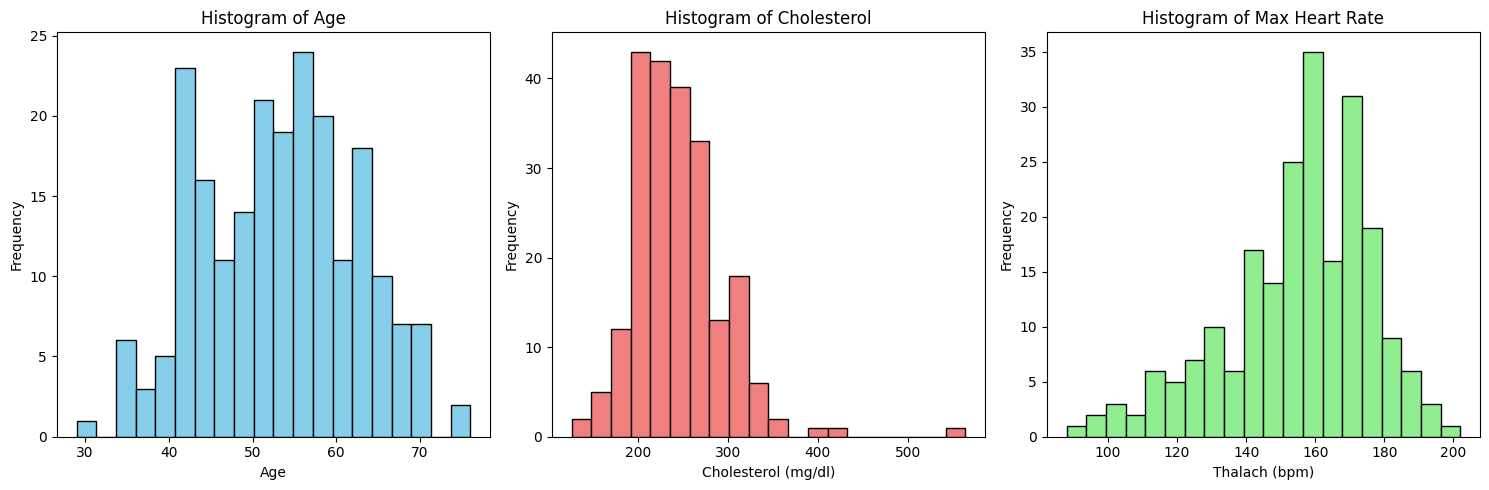

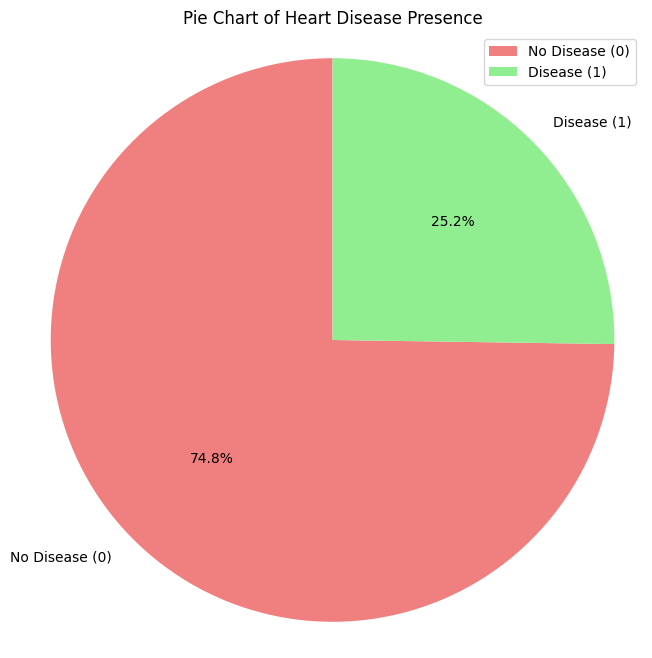

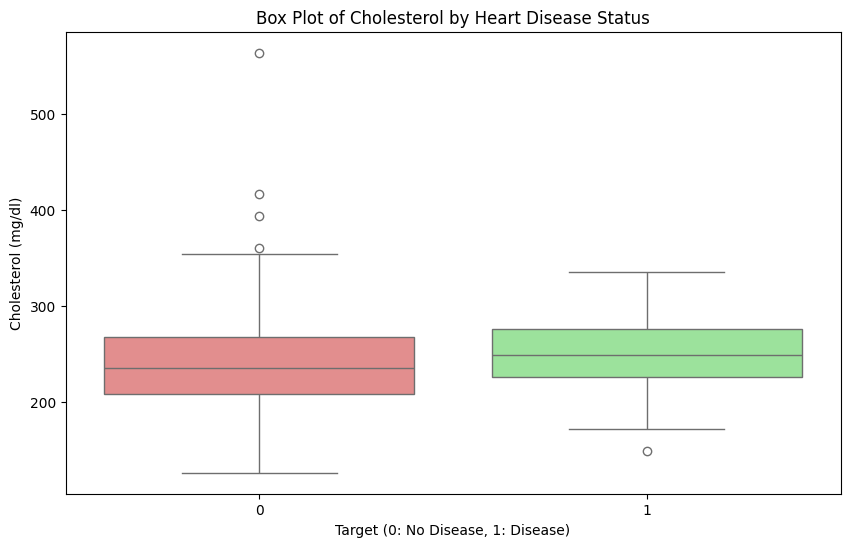

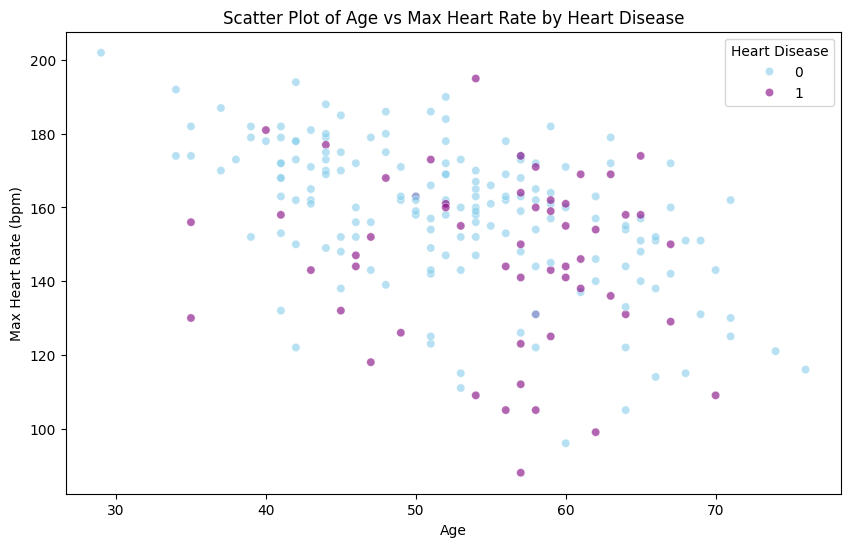

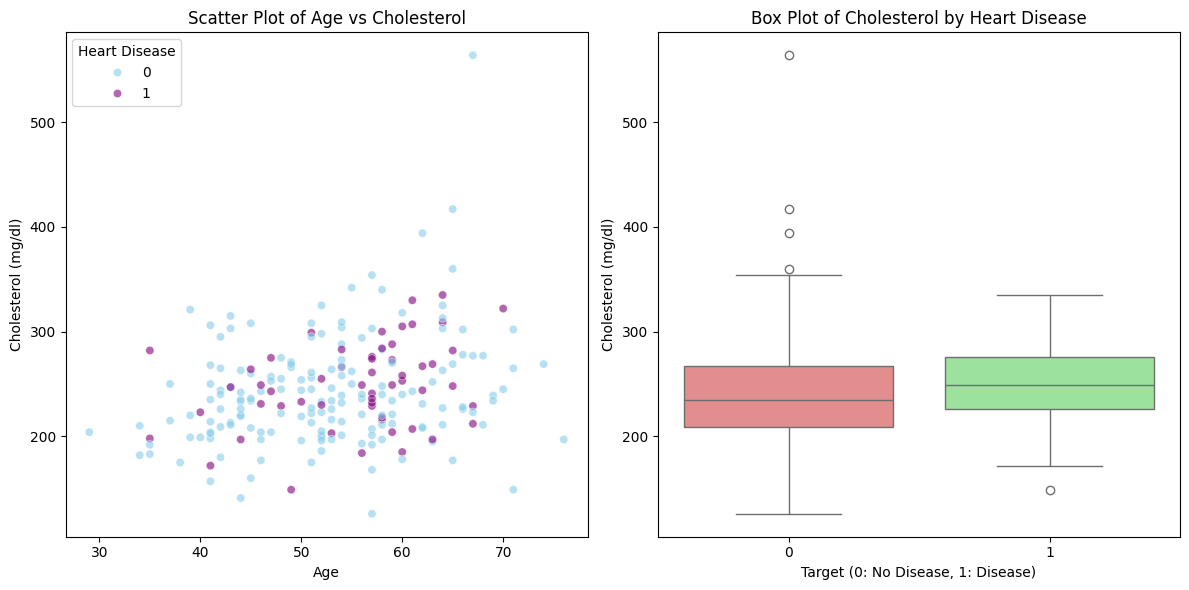

In [8]:

# a. Histograms
# Objective: To show the distribution of continuous variables like age, cholesterol, and maximum heart rate
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['chol'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['thalach'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Max Heart Rate')
plt.xlabel('Thalach (bpm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# b. Pie Charts
# Objective: To show the proportion of patients with and without heart disease (target)
target_counts = df['target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=['No Disease (0)', 'Disease (1)'],
        autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Pie Chart of Heart Disease Presence')
plt.axis('equal')
plt.legend(loc='best')
plt.show()

# c. Box Plots
# Objective: To visualize the spread and identify outliers in cholesterol levels across heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', hue='target', data=df,
            palette={0: 'lightcoral', 1: 'lightgreen'}, dodge=False)
plt.title('Box Plot of Cholesterol by Heart Disease Status')
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Cholesterol (mg/dl)')
plt.legend([], [], frameon=False)  # remove duplicate legend
plt.show()

# d. Scatter Plots
# Objective: To explore the relationship between age and maximum heart rate, colored by heart disease status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df,
                palette={0: 'skyblue', 1: 'purple'}, alpha=0.6)
plt.title('Scatter Plot of Age vs Max Heart Rate by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (bpm)')
plt.legend(title='Heart Disease')
plt.show()

# e. Combined Scatter and Box Plots
# Objective: Combine scatter plot of age vs cholesterol with box plots to show distribution and outliers
plt.figure(figsize=(12, 6))

# Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='chol', hue='target', data=df,
                palette={0: 'skyblue', 1: 'purple'}, alpha=0.6)
plt.title('Scatter Plot of Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.legend(title='Heart Disease')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='chol', hue='target', data=df,
            palette={0: 'lightcoral', 1: 'lightgreen'}, dodge=False)
plt.title('Box Plot of Cholesterol by Heart Disease')
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Cholesterol (mg/dl)')
plt.legend([], [], frameon=False)  # remove duplicate legend
plt.tight_layout()
plt.show()
